# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# #importing the dataset as a dataframe
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Build the model

Create a function to find the slope of the regression line

In [2]:
def Slope(a,b):
    n = len(a)
    dot_sum = np.sum(a*b)
    sum_X = np.sum(a)
    sum_Y = np.sum(b)
    sum_X2 = np.sum(a**2)
    slope = (n * dot_sum - sum_X * sum_Y)/(n * sum_X2 - sum_X**2)
    return slope

Create a function to find the intercept of the linear regression line

In [3]:

def Intercept(a,b):
    intercept = np.mean(b) - Slope(a,b) * np.mean(a)
    return intercept

Create a function to make predictions using the linear regression algorithm


In [4]:
def Prediction(slope, x_input, intercept):
    predict = slope * x_input + intercept
    return predict

Create a function to find R-squared, which is the regression metric
  

In [5]:
def R_squared(predicted_values, test_values):
    f = predicted_values
    y = test_values
    sum_sq = np.sum((y - np.mean(y))**2) #equation for sum of squares
    sum_reg = np.sum((f - np.mean(y))**2) #equation for regression sum
    sum_res = np.sum((y - f)**2) #equation for residuals sum of squares
    R_2 = 1 - (sum_res/sum_sq) #equation for R-squared
    return R_2 

Create a function to find the correlation coefficient for given x and y values


In [6]:
def Correlation_coeff(predicted_values, test_values):
    a = predicted_values
    b = test_values
    n = len(a)
    dot_sum = np.sum(a*b)
    sum_X = np.sum(a)
    sum_Y = np.sum(b)
    sum_X2 = np.sum(a**2)
    sum_Y2 = np.sum(b**2)
    score = (n *dot_sum - sum_X * sum_Y) / np.sqrt((n * sum_X2 - (sum_X)**2)*(n * sum_Y2 - (sum_Y)**2))
    return score

Create a function to find the covariance for given x and y values


In [7]:
def Covariance(X,Y):
    a = X
    b = Y
    n = len(a)
    dot_sum = np.sum(a*b)
    cov = dot_sum / n - np.mean(a) * np.mean(b)
    return cov

# Pre-Processing


In [8]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['enginesize'] = le.fit_transform(res_df['enginesize'])
    res_df['price'] = le.fit_transform(res_df['price'])
    res_df['fueltype'] = le.fit_transform(res_df['fueltype'])

    
    
    return res_df
#Run the function on the desired dataset
encoded_df = preprocessor(df)

In [9]:
#Setting which variables will be compared in the regression
X = encoded_df.enginesize
y = encoded_df.price

# Implementation

In [10]:
#Divide the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
#Find the intercept of the training regression line using the functions created previously
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))

R-squared: 0.37223028373937794
Correlation Coefficient: 0.6938061142103015


In [12]:
#Equation of the regression line
y_est = slope * X + intercept

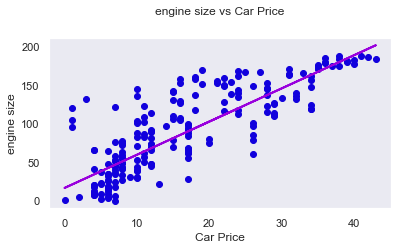

In [13]:
#Plot the linear regression function
plt.scatter(X,y, c='#10d')
sns.color_palette("husl", 8)
sns.dark_palette("#69d", reverse=True, as_cmap=True)
plt.plot(X,y_est, color = '#90d',linewidth=2)
plt.title('engine size vs Car Price', y=1.1)
plt.ylabel('engine size')
plt.xlabel('Car Price')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

C:\Users\Rao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


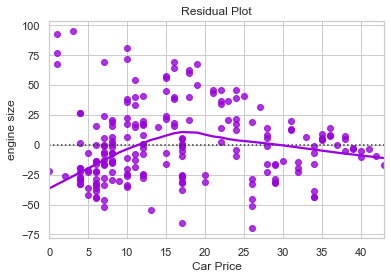

In [14]:

sns.set(style="whitegrid")



sns.residplot(X, y, lowess=True, color="#90d")
plt.title('Residual Plot')
plt.ylabel('engine size')
plt.xlabel('Car Price')
plt.show()